In [1]:
import tarfile

data_dir = "archives/"

fichero = data_dir + "housing.tgz"
f = tarfile.open(fichero)
f.extractall(path="archives/")
f.close()

In [2]:
import pandas as pd

datos = pd.read_csv("archives/housing.csv")
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
datos["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [5]:
datos["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

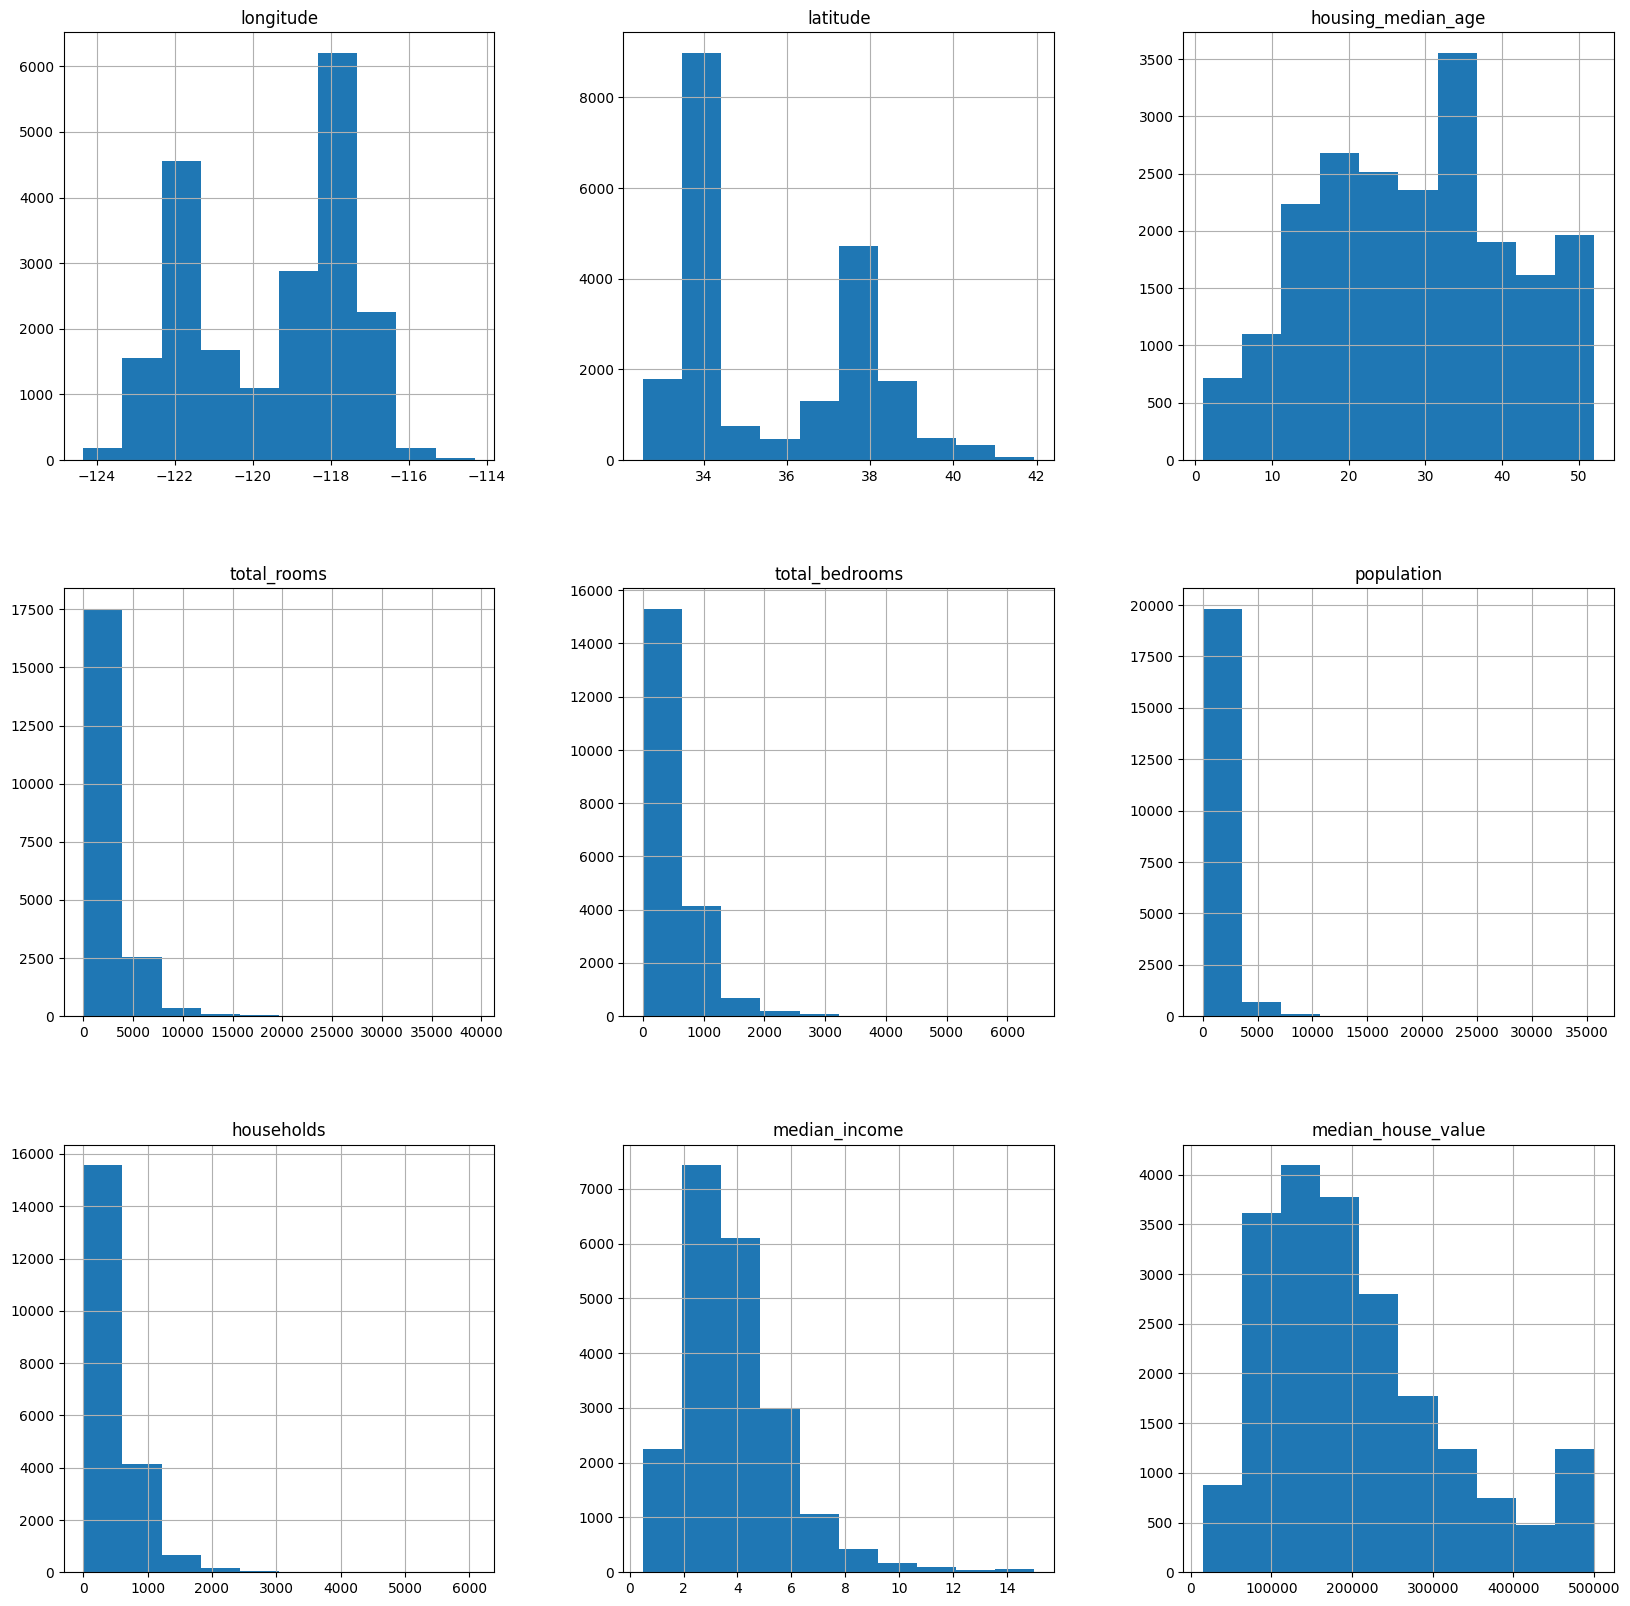

In [7]:
datos.hist(figsize=(20, 20))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

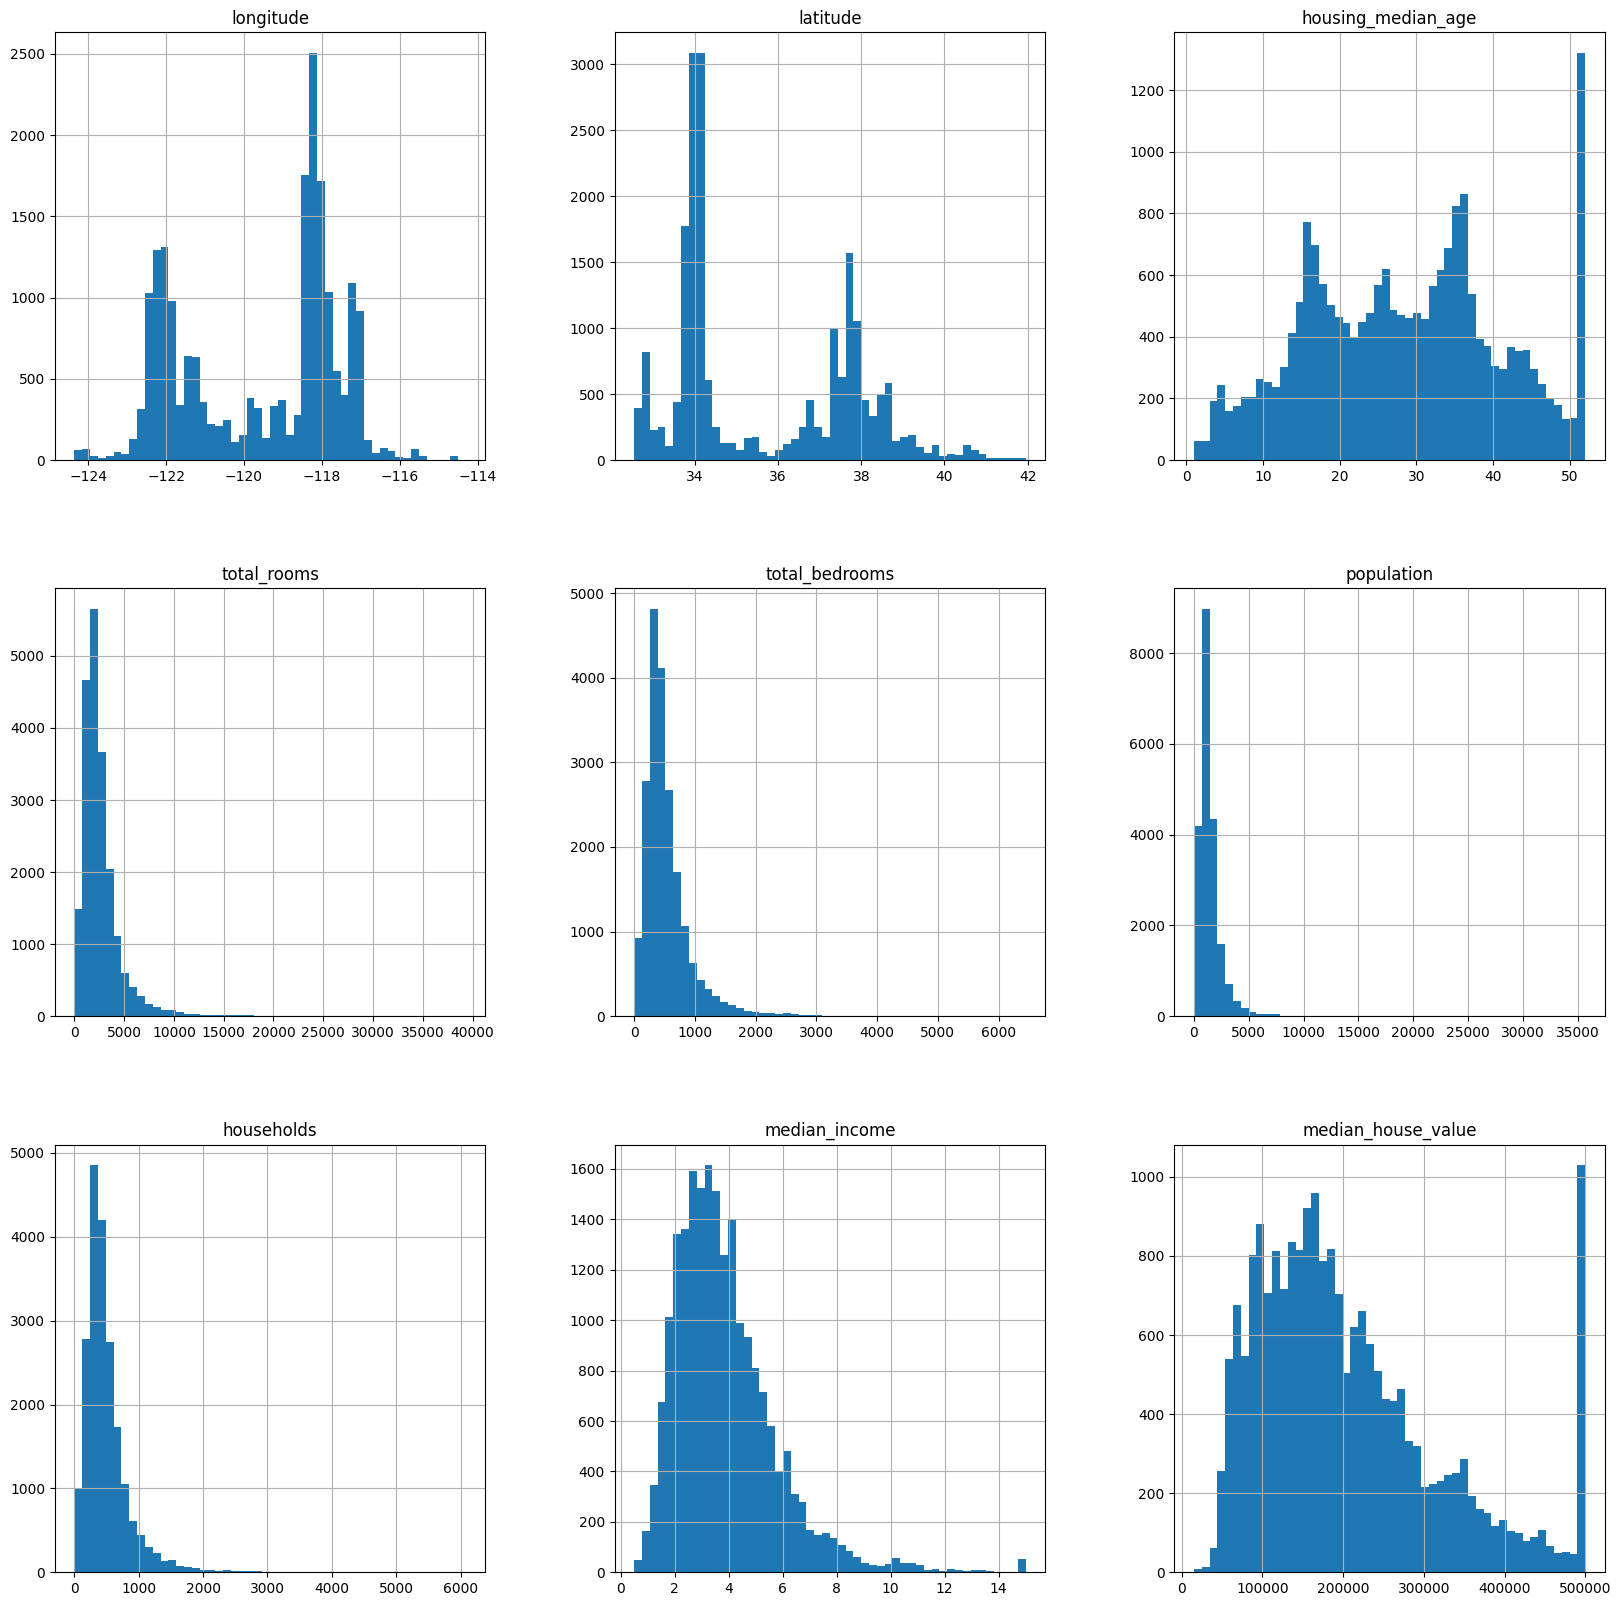

In [8]:
datos.hist(bins=50, figsize=(20, 20))

<Axes: xlabel='longitude', ylabel='latitude'>

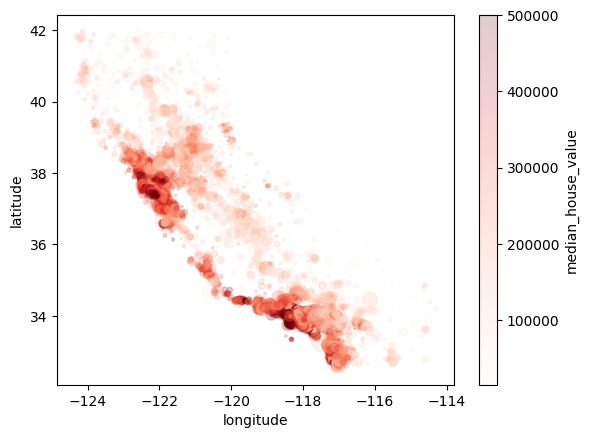

In [9]:
datos.plot(kind="scatter", x = "longitude", y="latitude",
           alpha=0.2,
           s=datos["population"]/100,
           c="median_house_value",
           cmap="Reds")

In [10]:
# %pip install pillow
# %pip install basemap
# %pip install basemap-data-hires

Text(198479.32205233915, 635961.3005923651, 'San Francisco')

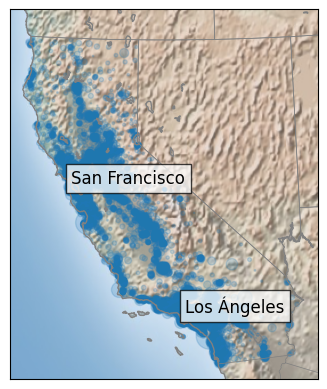

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='lcc',
            resolution='h',
            lat_0=37.5,
            lon_0=-119,
            width=1E6,
            height=1.2E6)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter( datos["longitude"], list(datos["latitude"]),
           alpha=0.2,
           latlon=True,
           s=datos["population"]/100,)

x, y = m(-118.243683, 34.052235)
plt.text(x, y, 'Los Ángeles', fontsize=12, bbox=dict(facecolor="white", alpha=0.75))

x, y = m(-122.431297, 37.773972)
plt.text(x, y, 'San Francisco', fontsize=12, bbox=dict(facecolor="white", alpha=0.75))

In [13]:
datos2 = datos.copy()
datos2.drop("ocean_proximity", axis=1, inplace=True)
corr_matrix = datos2.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

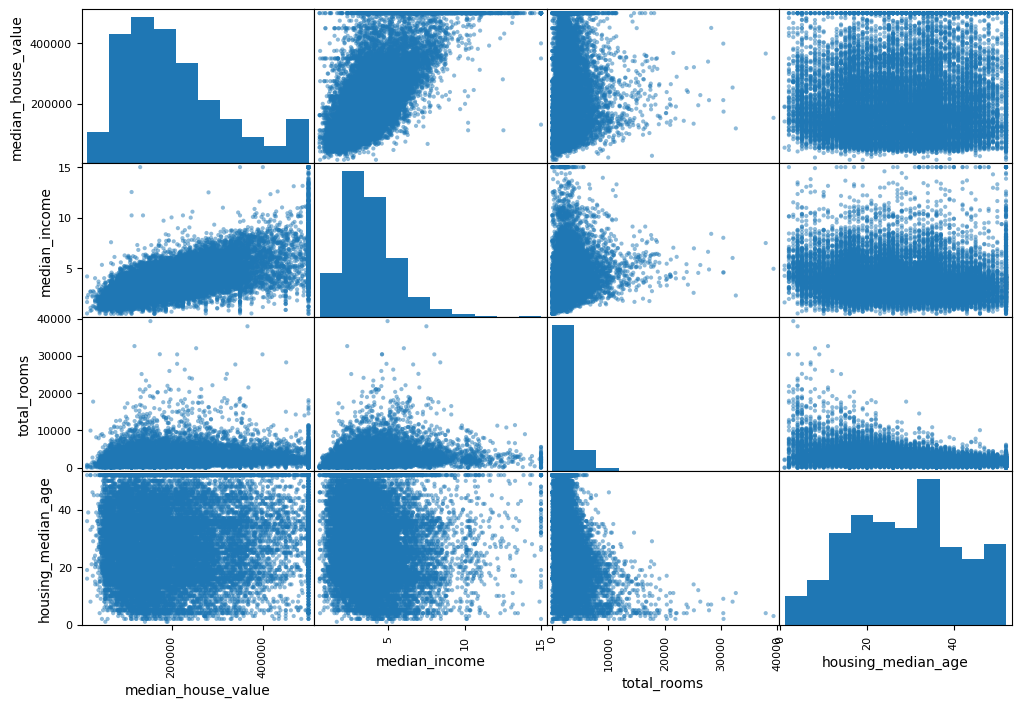

In [14]:
from pandas.plotting import scatter_matrix
atributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(datos[atributes], figsize=(12,8))

In [15]:
datos2["rooms_per_household"] = datos2["total_rooms"]/datos2["households"]
datos2["bedrooms_per_rooms"] = datos2["total_bedrooms"]/datos2["total_rooms"]
datos2["population_per_household"] = datos2["population"]/datos2["households"]

In [16]:
corr_matrix = datos2.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

<Axes: xlabel='bedrooms_per_rooms', ylabel='median_house_value'>

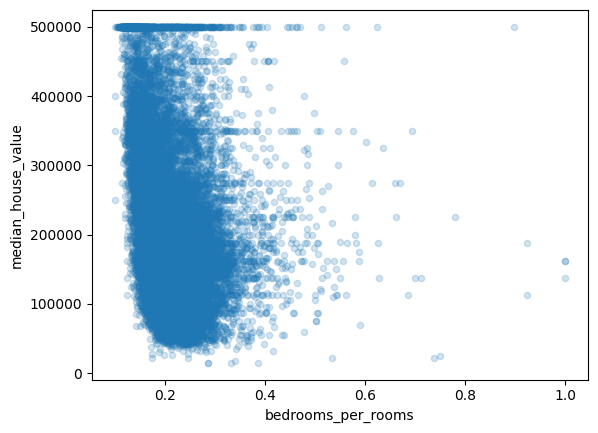

In [17]:
datos2.plot(kind="scatter", x="bedrooms_per_rooms", y="median_house_value", alpha=0.2)

<Axes: >

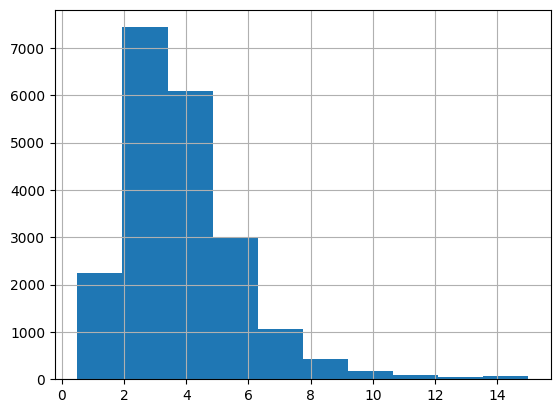

In [18]:
datos["median_income"].hist()

In [19]:
import numpy as np
datos["income_cat"] = pd.cut(datos["median_income"],
                             bins=[0.0, 1.5, 3, 4.5, 6, np.inf],
                             labels=[1,2,3,4,5])

In [20]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
datos["income_cat"] = pd.to_numeric(datos["income_cat"])
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  income_cat          20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


<Axes: >

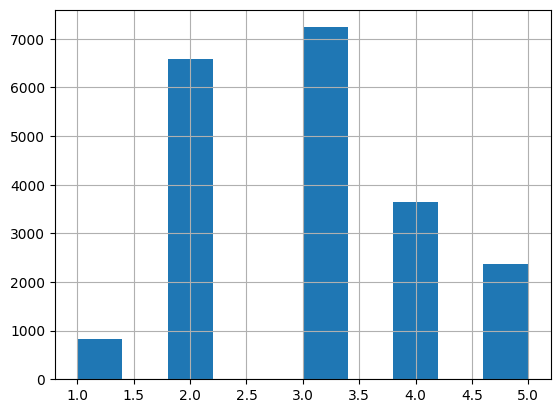

In [22]:
datos["income_cat"].hist()

In [23]:
datos["income_cat"].value_counts()/len(datos)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [24]:
media = datos["total_bedrooms"].median()
datos["total_bedrooms"].fillna(media, inplace=True)

In [25]:
housing_cat = datos[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [26]:
# si ordenados:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
housing_cat_encoded = oe.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [27]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_hot = cat_encoder.fit_transform(housing_cat)
housing_cat_hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [31]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
col_aux = [cat for cat in cat_encoder.categories_[0]]

daux = pd.DataFrame(housing_cat_hot,)
daux
datos3 = datos.copy()

datos3 = datos3.join(daux)
datos3 = datos3.drop(["ocean_proximity"], axis = 1)
datos3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   income_cat          20640 non-null  int64  
 10  0                   20640 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [34]:
def split_train_test(data, test_ratio):
  # indices = [i for i in range(len(data))]; indices = np.shuffle(.....)
  indices = np.random.permutation(len(data))
  lg_test = int(len(data) * test_ratio)
  test_indices = indices[:lg_test]
  train_indices = indices[lg_test:]

  return data.iloc[train_indices], data.iloc[test_indices]

np.random.seed(42)

datos_train, datos_test = split_train_test(datos3, 0.2)
len(datos_train), len(datos_test)

(16512, 4128)

In [35]:
y_train = datos_train["median_house_value"].copy()
x_train = datos_train.drop("median_house_value", axis=1)
x_train = datos_train[["housing_median_age", "total_rooms", "median_income"]]

In [36]:
# regresión lineal
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [37]:
datos_prueba = x_train.iloc[:5]
print("Prediciones: ", lin_reg.predict(datos_prueba))
y_reales = y_train.iloc[:5]
print("Reales: ", list(y_reales))

Prediciones:  [191241.19032347 247421.98530848 167458.91940355 134423.69271645
 220699.12183606]
Reales:  [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicciones = lin_reg.predict(x_train)
mse = mean_squared_error(y_train, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_train, predicciones)
score = r2_score(y_train, predicciones)
print(f"mae: {mae}   mse: {mse}    r2_score: {score}")

# con todas las columnas mae: 49704.12411854149   mse: 68235.55069803342

mae: 59986.95523463257   mse: 80335.34309584109    r2_score: 0.5172148009737971


In [39]:
# regresión Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [40]:
predicciones = tree_reg.predict(x_train)
mse = mean_squared_error(y_train, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_train, predicciones)
score = r2_score(y_train, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

mae: 0.0   rmse: 0.0 r2_score: 1.0


In [41]:
# NO DEBERÍA UTILIZAR TODAVÍA LOS DATOS DE TEST
y_test = datos_test["median_house_value"].copy()
x_test = datos_test.drop("median_house_value", axis=1)
x_test = datos_test[["housing_median_age", "total_rooms", "median_income"]]

predicciones = tree_reg.predict(x_test)
mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)
score = r2_score(y_test, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

mae: 79749.89244186046   rmse: 109820.45553929616 r2_score: 0.07963600256702663


In [42]:
# cross-validation lineal
from sklearn.model_selection import cross_val_score

lin_score = cross_val_score(lin_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-lin_score)
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

Scores:  [77844.26670927 83074.03153461 79783.37858762 78294.91990665
 82458.25599305 79879.373579   77608.14437611 82148.77060192
 79589.03991482 82628.37269221]
Media:  80330.85538952649
Desviación Std 1985.6842361409094


In [43]:
# cross-validation arbol decision
from sklearn.model_selection import cross_val_score

lin_score = cross_val_score(tree_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-lin_score)
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

Scores:  [110277.73425958 110916.78935776 107487.69801765 109756.24939645
 110628.75584276 112096.61489884 108119.64667903 114592.53650052
 105454.92292293 111068.14525788]
Media:  110039.90931334005
Desviación Std 2418.464287774568


In [44]:
# regresión Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [45]:
# regresión random forest
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)

rf_reg.fit(x_train, y_train)

predicciones = rf_reg.predict(x_test)
mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)
score = r2_score(y_test, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

rf_score = cross_val_score(rf_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-lin_score)
print("RF cross")
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

mae: 59532.25312742249   rmse: 80360.0504932675 r2_score: 0.5071967742506309
RF cross
Scores:  [110277.73425958 110916.78935776 107487.69801765 109756.24939645
 110628.75584276 112096.61489884 108119.64667903 114592.53650052
 105454.92292293 111068.14525788]
Media:  110039.90931334005
Desviación Std 2418.464287774568


In [46]:
# regresión SVM
from sklearn.svm import SVR

sv_reg = SVR()

sv_reg.fit(x_train, y_train)

predicciones = sv_reg.predict(x_test)
mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)
score = r2_score(y_test, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

rf_score = cross_val_score(sv_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-lin_score)
print("SV cross")
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

mae: 87331.8066102977   rmse: 117216.47266183165 r2_score: -0.048504832569613354
SV cross
Scores:  [110277.73425958 110916.78935776 107487.69801765 109756.24939645
 110628.75584276 112096.61489884 108119.64667903 114592.53650052
 105454.92292293 111068.14525788]
Media:  110039.90931334005
Desviación Std 2418.464287774568


In [47]:
# regresión xgboost
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

xgb_reg.fit(x_train, y_train)

predicciones = xgb_reg.predict(x_test)
mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)
score = r2_score(y_test, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

rf_score = cross_val_score(xgb_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-lin_score)
print("XGB cross")
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

mae: 58478.35489104515   rmse: 79649.54062244536 r2_score: 0.5158725690446
XGB cross
Scores:  [110277.73425958 110916.78935776 107487.69801765 109756.24939645
 110628.75584276 112096.61489884 108119.64667903 114592.53650052
 105454.92292293 111068.14525788]
Media:  110039.90931334005
Desviación Std 2418.464287774568
